In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
class dgp_store_coupons():
    """
    Data Generating Process: store coupons
    """
    
    def generate_data(self, seed=1, N=300, K=5):
        np.random.seed(seed)
        
        # Incomme
        income = np.round(np.random.normal(50, 10, N), 3) 
        
        # Using a coupon
        coupons = np.round(np.random.normal(0.5, 0.1, N) - income / 200, 3)
        
        # Day of the week
        day = np.random.choice(range(1,8), N)
        
        # Sales
        sales = np.round(10 * (income + 20*coupons + day + np.random.normal(10, 2, N)), 1)

        # Generate the dataframe
        df = pd.DataFrame({'sales': sales, 'coupons': coupons, 'income': income, 'dayofweek': [str(d) for d in day]})

        return df

In [10]:
df = dgp_store_coupons().generate_data(N=50)
df.head()

,sales,coupons,income,dayofweek
0,821.7,0.199,66.243,2
1,602.3,0.245,43.882,3
2,655.1,0.162,44.718,5
3,625.8,0.269,39.270,4
4,696.6,0.186,58.654,1


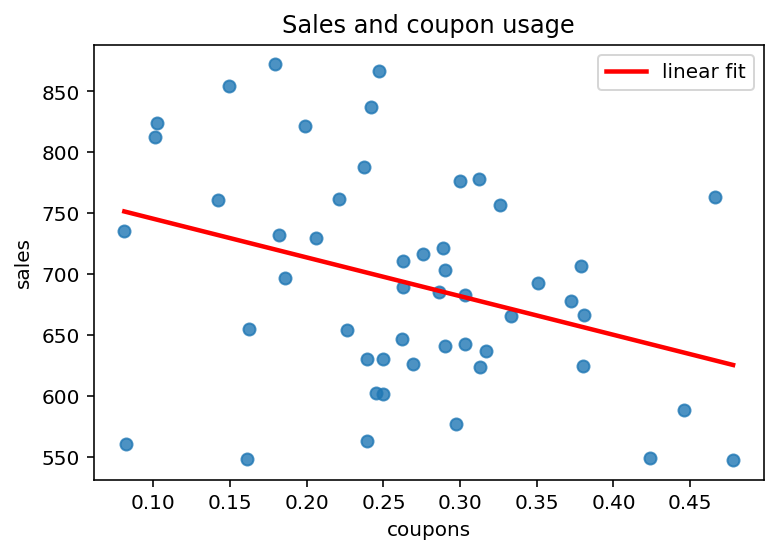

In [17]:
sns.regplot(x="coupons", y="sales", data=df, ci=False, line_kws={'color':'r', 'label':'linear fit'})
plt.legend()
plt.title(f"Sales and coupon usage");

In [24]:
smf.ols('sales ~ coupons + income', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,161.4982,33.253,4.857,0.000,94.601,228.395
coupons,218.7548,50.058,4.370,0.000,118.052,319.458
income,9.5094,0.480,19.818,0.000,8.544,10.475


Let's now verify that the Frisch-Waugh-Lowell theorem actually holds. In particular, we want to check whether we get the same coefficient if, instead of regressing sales on `coupons` and `income`, we were

- regressing `coupons` on `income`
- computing the residuals `coupons_tilde`, i.e. the variation in `coupons` not explained by `income`
- regressing `sales` on `coupons_tilde`

Note: add “-1” to the regression formula to remove the intercept.

In [29]:
df['coupons_tilde'] = smf.ols('coupons ~ income', df).fit().resid
smf.ols('sales ~ coupons_tilde', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,692.7160,12.345,56.112,0.000,667.894,717.538
coupons_tilde,218.7548,157.887,1.386,0.172,-98.697,536.207


In [30]:
smf.ols('sales ~ coupons_tilde - 1', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
coupons_tilde,218.7548,1275.236,0.172,0.865,-2343.929,2781.438


In [32]:
df['sales_tilde'] = smf.ols('sales ~ income', df).fit().resid
smf.ols('sales_tilde ~ coupons_tilde', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.999e-13,3.873,5.16e-14,1.000,-7.787,7.787
coupons_tilde,218.7548,49.533,4.416,0.000,119.161,318.348


In [31]:
df['sales_tilde'] = smf.ols('sales ~ income', df).fit().resid
smf.ols('sales_tilde ~ coupons_tilde - 1', df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
coupons_tilde,218.7548,49.025,4.462,0.000,120.235,317.275
